In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 读取数据

In [3]:
nba = pd.read_csv("./data/nba_2017_nba_players_with_salary.csv")
nba

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,466,Brice Johnson,PF,22,3.0,0.7,2.3,0.286,0.0,0.0,...,3,3.0,-2.32,1.08,-1.24,0.01,10.8,95.72,1,1.33
338,471,Mike Tobey,C,22,12.5,0.5,2.0,0.250,0.0,0.0,...,2,12.5,-1.91,0.99,-0.92,0.03,-1.6,91.41,0,0.07
339,475,Alonzo Gee,SF,29,6.8,0.2,1.1,0.214,0.0,0.2,...,13,6.8,-2.11,0.43,-1.68,0.08,0.8,104.33,4,0.06
340,481,John Lucas III,PG,34,2.2,0.2,0.8,0.250,0.0,0.2,...,5,2.2,-1.30,-0.61,-1.91,0.01,7.3,94.47,3,0.98


# 数据处理

## 数据相关性

In [5]:
data_corr = nba.loc[:,['RPM','AGE','SALARY_MILLIONS','ORB','TRB',
                       'AST','STL','BLK','TOV','PF','POINTS','GP',
                       'MPG','ORPM','DRPM']]
data_corr.head()

,RPM,AGE,SALARY_MILLIONS,ORB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM
0,6.27,28,26.50,1.7,10.7,10.4,1.6,0.4,5.4,2.3,31.6,81,34.6,6.74,-0.47
1,4.81,27,26.50,1.2,8.1,11.2,1.5,0.5,5.7,2.7,29.1,81,36.4,6.38,-1.57
2,1.83,27,6.59,0.6,2.7,5.9,0.9,0.2,2.8,2.2,28.9,76,33.8,5.72,-3.89
3,4.35,23,22.12,2.3,11.8,2.1,1.3,2.2,2.4,2.2,28.0,75,36.1,0.45,3.90
4,4.20,26,16.96,2.1,11.0,4.6,1.4,1.3,3.7,3.9,27.0,72,34.2,3.56,0.64


In [7]:
# 获得各列之间的相关性
corr = data_corr.corr()
corr

,RPM,AGE,SALARY_MILLIONS,ORB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM
RPM,1.000000,0.175820,0.477542,0.388764,0.587853,0.481971,0.599008,0.463097,0.492014,0.434226,0.604432,0.340810,0.549449,0.769822,0.578388
AGE,0.175820,1.000000,0.353312,-0.015752,0.062064,0.114908,0.069892,-0.062917,0.030673,0.005512,0.031422,0.051863,0.099657,0.136177,0.100636
SALARY_MILLIONS,0.477542,0.353312,1.000000,0.264954,0.482088,0.486159,0.446763,0.260288,0.536993,0.341512,0.635425,0.348093,0.594162,0.503682,0.102307
ORB,0.388764,-0.015752,0.264954,1.000000,0.861103,-0.011632,0.169075,0.654265,0.274670,0.557957,0.284908,0.296975,0.342140,0.102113,0.476857
TRB,0.587853,0.062064,0.482088,0.861103,1.000000,0.257379,0.415318,0.698947,0.531124,0.675389,0.573219,0.446355,0.618587,0.352018,0.468489
AST,0.481971,0.114908,0.486159,-0.011632,0.257379,1.000000,0.683438,0.050367,0.839331,0.323374,0.678980,0.334944,0.640273,0.673077,-0.107280
STL,0.599008,0.069892,0.446763,0.169075,0.415318,0.683438,1.000000,0.257638,0.669642,0.509130,0.653695,0.441132,0.749596,0.593146,0.177728
BLK,0.463097,-0.062917,0.260288,0.654265,0.698947,0.050367,0.257638,1.000000,0.310396,0.601185,0.352639,0.314585,0.387176,0.138512,0.546464
TOV,0.492014,0.030673,0.536993,0.274670,0.531124,0.839331,0.669642,0.310396,1.000000,0.566313,0.834074,0.398315,0.743525,0.621213,-0.025302
PF,0.434226,0.005512,0.341512,0.557957,0.675389,0.323374,0.509130,0.601185,0.566313,1.000000,0.533770,0.522945,0.668645,0.288196,0.310046


对两个变量或多个变量之间相关关系的分析，叫做相关性分析。

通常用来分析两组或多组数据的变化趋势是否一致。

比如身高和体重是否存在关系，天气冷和袜子的销量是否存在关系，客户满意度和客户投诉率是否存在关系等。

<AxesSubplot:>

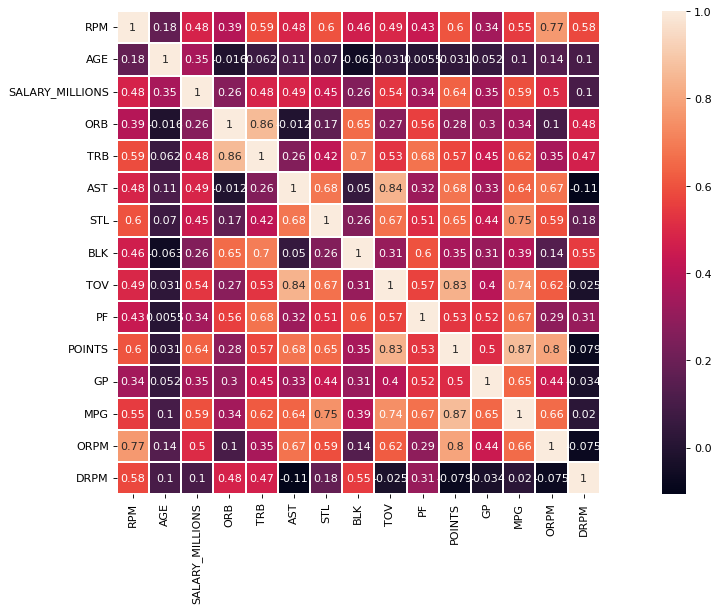

In [10]:
plt.figure(figsize=(20,8),dpi=80)
# 热力图
sns.heatmap(corr,square=True,linewidths=0.1,annot=True)

# 其他数据分析

## 基本分析

In [12]:
# 按照RPM（效率值）排名
nba.loc[:,['PLAYER','RPM']].sort_values(by='RPM',ascending=False)

,PLAYER,RPM
6,LeBron James,8.42
37,Chris Paul,7.92
8,Stephen Curry,7.41
120,Draymond Green,7.14
7,Kawhi Leonard,7.08
...,...,...
207,Marcus Thornton,-4.95
257,Trey Burke,-5.24
101,Brandon Knight,-5.32
92,Jahlil Okafor,-5.69


In [14]:
# 按照球员薪资排名
nba.loc[:,['PLAYER','SALARY_MILLIONS']].sort_values(by='SALARY_MILLIONS',ascending=False)

,PLAYER,SALARY_MILLIONS
6,LeBron James,30.96
25,Mike Conley,26.54
67,Al Horford,26.54
0,Russell Westbrook,26.50
1,James Harden,26.50
...,...,...
280,Anthony Brown,0.06
264,Jarell Eddie,0.06
299,Jarrett Jack,0.06
339,Alonzo Gee,0.06


## Seaborn常用的三个数据分析的方法

### 单变量

In [ ]:
# 用displot绘制球员薪水、效率值、年龄三个信息的分布情况

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

Text(0, 0.5, 'age')

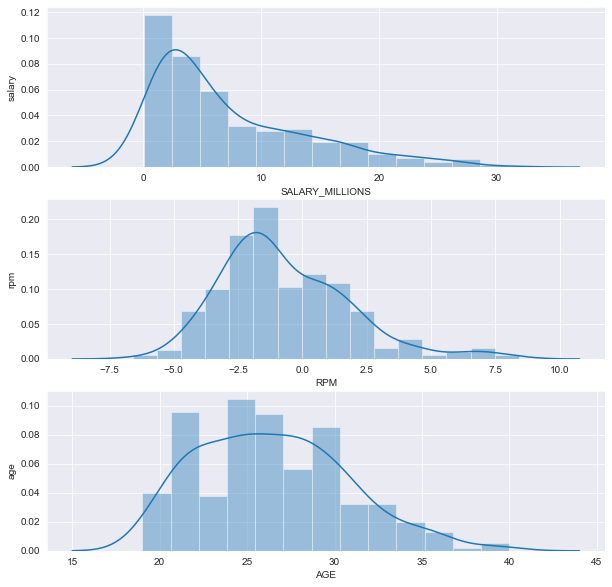

In [36]:
# 设置背景
sns.set_style('darkgrid')
# 设置画布大小
plt.figure(figsize=(10,10))
# 画三幅图，这是第一行，第一列
plt.subplot(3,1,1)
sns.distplot(nba['SALARY_MILLIONS'])
plt.ylabel('salary')

plt.subplot(3,1,2)
sns.distplot(nba['RPM'])
plt.ylabel('rpm')

plt.subplot(3,1,3)
sns.distplot(nba['AGE'])
plt.ylabel('age')

### 双变量

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


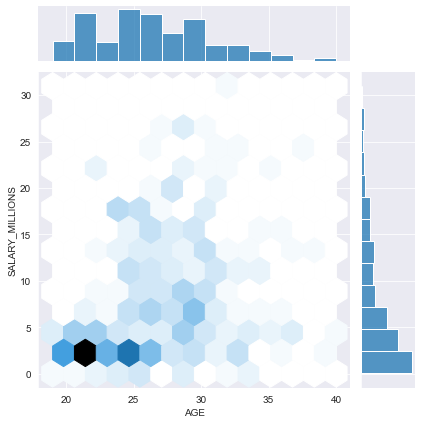

In [39]:
sns.jointplot(nba.AGE,nba.SALARY_MILLIONS,kind='hex')

### 多变量

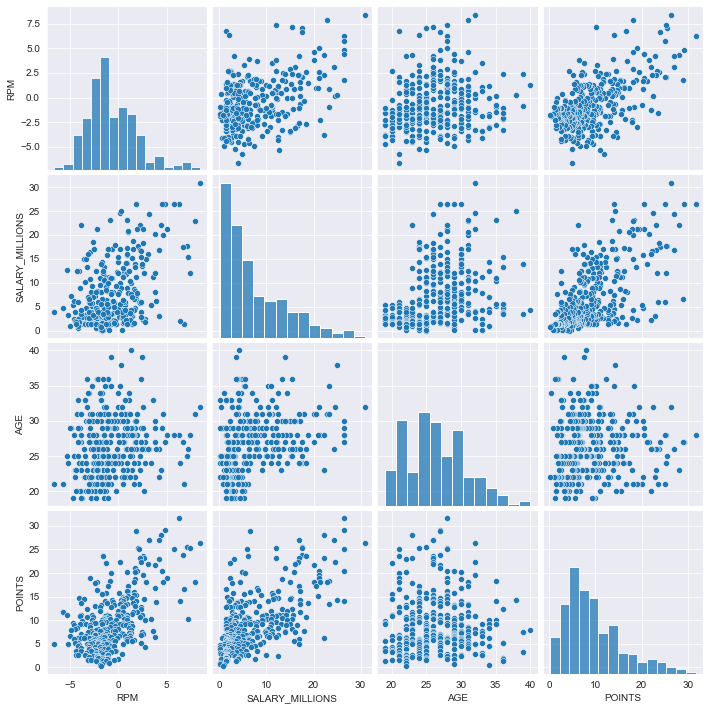

In [41]:
multi_data=nba.loc[:,['RPM','SALARY_MILLIONS','AGE','POINTS']]
sns.pairplot(multi_data)